# Matplotlib cheat sheet: Most frequently used commands

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from testdata import data1, data2, data3
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec

# 1) Set global settings

This will override the default matplotlib settings.
Getting a consistent look across figures is much easier if you adopt this approach.
I mainly tweak the figure size and font size

More information here: https://matplotlib.org/stable/users/explain/customizing.html

In [20]:
plt.rcParams.update({
'figure.figsize':(6,3),
'font.size': 10, 
'lines.markersize':5, 
'axes.linewidth':0.6
})

# 2) 1d plots

Text(0, 0.5, 'ylabel')

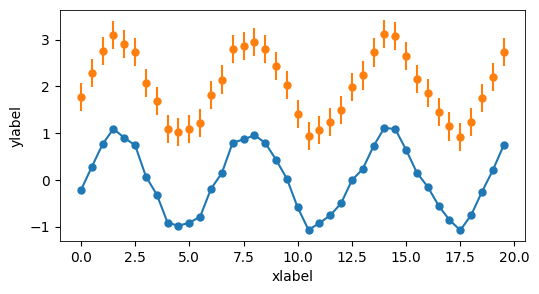

In [21]:
# basic 1d plot
plt.plot(data1.x, data1.y, 'o-', label='simple line')
plt.errorbar(data1.x, data1.y+2, data1.dy*3, fmt='o', label='errorbar')
plt.xlabel('xlabel')
plt.ylabel('ylabel')

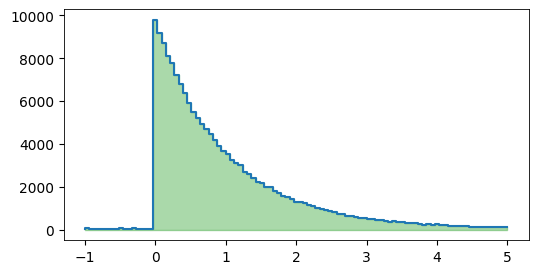

In [22]:
# filled histogram
plt.plot(data2.x, data2.y, drawstyle="steps")
plt.fill_between(data2.x, data2.y, step="pre", color='tab:green', alpha=0.4)

## Legends

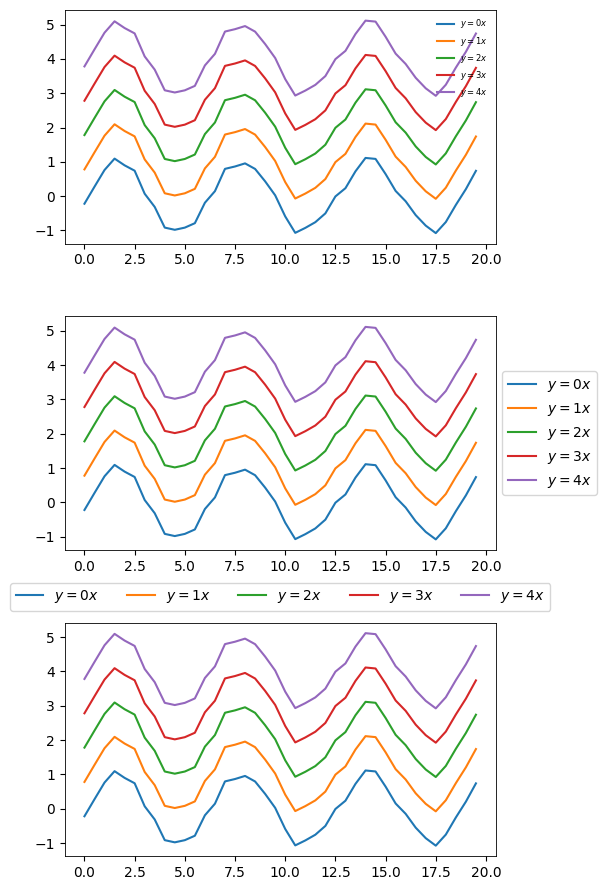

In [23]:
fig = plt.figure(figsize=(6,9))

# normal legend inside, box off, change font size
ax = plt.subplot(3,1,1)
for i in range(5):
    ax.plot(data1.x, data1.y+i, label='$y = %ix$'%i)
plt.legend(frameon=False, loc='upper right', fontsize=6)

# place legend to the right of plot
ax = plt.subplot(3,1,2)
for i in range(5):
    ax.plot(data1.x, data1.y+i, label='$y = %ix$'%i)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), )

# place legend above plot and change the number of columbs
ax = plt.subplot(3,1,3)
for i in range(5):
    ax.plot(data1.x, data1.y+i, label='$y = %ix$'%i)
ax.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), ncol=5)

plt.tight_layout()
plt.show()

# 2) Modifying axes and ticks

### Change axes limits and ticks

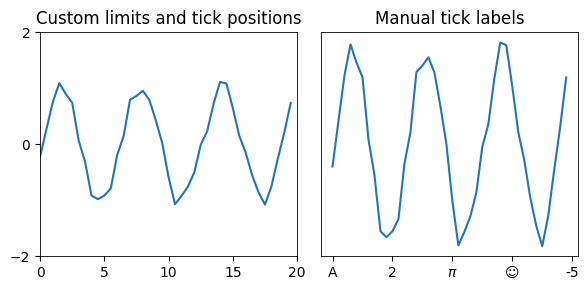

In [24]:
# automatic ticks
plt.subplot(1,2,1)
plt.plot(data1.x, data1.y)
plt.ylim(-2,2) # set ylimt
plt.xlim(0,20) # set xlim
plt.xticks(ticks = [0,5,10,15,20]) # custom tick positions using a list
plt.yticks(np.linspace(-2,2,3)) # custom tick positions using numpy arange
plt.title('Custom limits and tick positions')

# manual tick values and labels
plt.subplot(1,2,2)
plt.plot(data1.x, data1.y)
plt.xticks(ticks = [0,5,10,15,20], labels=['A','2','$\pi$','☺',-5]) # custom tick labels
plt.yticks(ticks = []) # turn off ticks
plt.title('Manual tick labels')

plt.tight_layout()

## Rotated labels

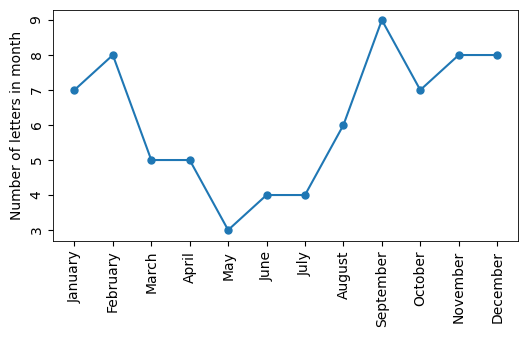

In [25]:
months = 'January February March April May June July August September October November December'.split( )
letters_in_month = [len(s) for s in months]
plt.plot(letters_in_month, 'o-')
plt.xticks(ticks = range(12), labels=months, rotation=90);
plt.ylabel('Number of letters in month')
plt.yticks(rotation=90);

## Dual y axis

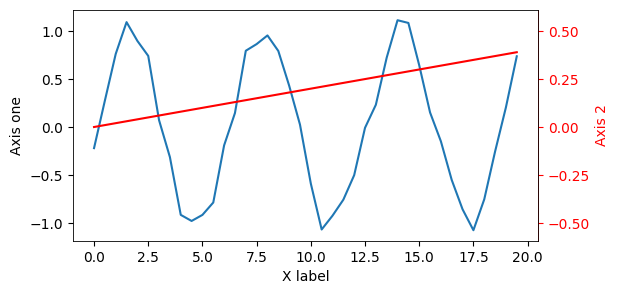

In [26]:
# plot data using normal x axis
plt.plot(data1.x, data1.y)
plt.xlabel('X label')
ax = plt.gca()

# define mapping between axis
map_func = lambda x: x*0.5 # maps first to second
map_func2 = lambda x: x*2 # does the inverse transformation
secax = ax.secondary_yaxis('right', functions=(map_func, map_func2))

# format first axis
ax.set_ylabel('Axis one')

# format second axis
secax.set_color('red')
secax.set_ylabel('Axis 2')
secax.set_yticks(map_func(ax.get_yticks())) # make the ticks appear the same place

# plot in second axis
plt.plot(data1.x, map_func2(data1.x*0.02), color='red') # because we are still plotting on the first axis we need the inverse transformation

## Dual x-axis (Spectrum examble)
Say I want to plot a spectrum and have both wavelength in nm and electron volts on my two x-axes

Text(0.5, 0, 'Energy (eV)')

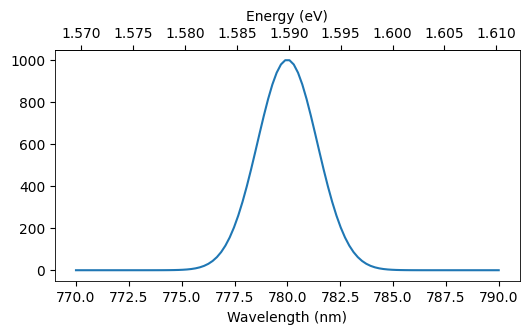

In [27]:
# make some data
x_nm = np.linspace(770, 790, 100)
y = 1000*np.exp(-((x_nm-780)**2/4)) # gaussian

# plot data using normal x axis
plt.plot(x_nm, y)
plt.xlabel('Wavelength (nm)')
ax = plt.gca()

# define mapping between axis
nm_to_ev = lambda x: 1.239841e3/x # convert nm to eV, https://en.wikipedia.org/wiki/Planck_constant
ev_to_nm = lambda x: x/1.239841e3
secax = ax.secondary_xaxis('top', functions=(nm_to_ev, ev_to_nm))

# format second axis
secax.set_xlabel('Energy (eV)')
#secax.set_xticks(nm_to_ev(ax.get_xticks())); # make the ticks appear the same place

# 3) Colormaps

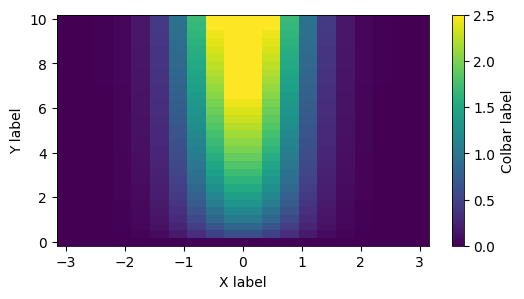

In [28]:
plt.pcolormesh(data3.x, data3.y, data3.z.transpose(), shading='nearest') # shading = nearest sets the tick in the centre, thus making the ticks less ambigious
plt.xlabel('X label')
plt.ylabel('Y label')
cbar = plt.colorbar(label='Colbar label')
plt.clim(0,2.5) # set colorbar limits

### Change colourscheme

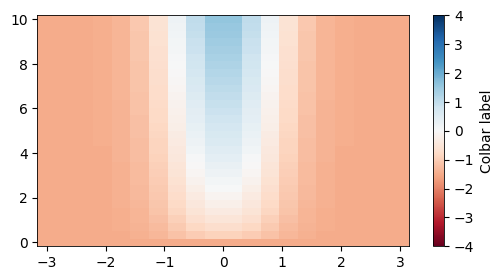

In [29]:
plt.pcolormesh(data3.x, data3.y, -1.5+data3.z.transpose(), cmap='RdBu', vmin=-4, vmax=4)
cbar = plt.colorbar(label='Colbar label')

### Logarithmic colourbar

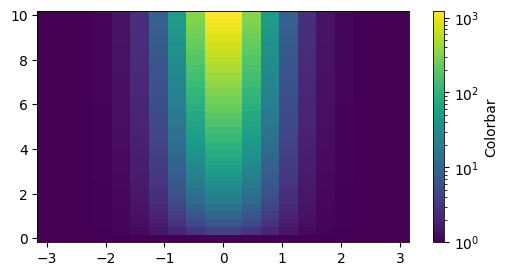

In [30]:
plt.pcolormesh(data3.x, data3.y, 10**data3.z.transpose(), norm=cm.colors.LogNorm())
plt.colorbar(label='Colorbar')

### Example: Add 1d plot above showing cut through

Not very elegant, sadly

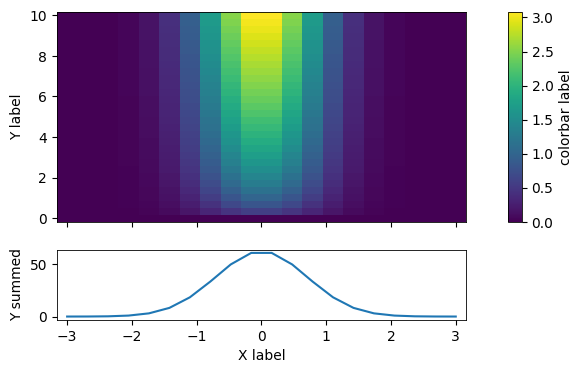

In [31]:
# create a 2x2 grid, use the second column for the colour bar
fig = plt.figure(figsize=(6,4))
gs = gridspec.GridSpec(2,2,height_ratios=[3,1],width_ratios=[30,1])
cax = fig.add_subplot(gs[0])
plt.ylabel('Y label')

# make the colorplot
CS = cax.pcolormesh(data3.x, data3.y, data3.z.transpose(), shading='nearest')

# make plot the summed counts
ax = fig.add_subplot(gs[2])
ax.plot(data3.x, np.sum(data3.z,axis=1))
plt.xlim(cax.get_xlim())
plt.xlabel('X label')
plt.ylabel('Y summed')

# Make a subplot for the colour bar
bax = fig.add_subplot(gs[1])
# Use general colour bar with specific axis given.
cbar = plt.colorbar(CS,bax, label='colorbar label')

# optional: Turn off the xtick labels on the 2d map
cax.set_xticklabels([]);

### Share colourbar across more figures

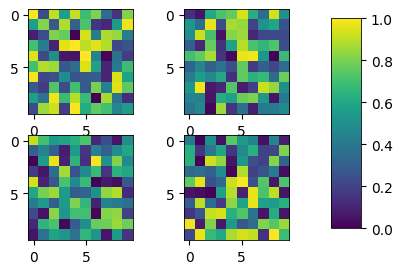

<Figure size 600x300 with 0 Axes>

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for ax in axes.flat:
    im = ax.imshow(np.random.random((10,10)), vmin=0, vmax=1) # manually set vrange so that the coulors mean the same for all plots

fig.subplots_adjust(right=0.6)
cbar_ax = fig.add_axes([0.65, 0.15, 0.05, 0.7])
fig.colorbar(im, cax=cbar_ax) # im specifices which colourplot the colourbar is based on

plt.show()
plt.tight_layout()

# 4) Text

In [46]:
import textwrap # library for wrapping text (big surprise)

Text(15, 0.3, 'If you want to add a\nlot of text (only\nfigures for internal\nuse, please dont use\nthis for a\npublication),\ntextwrap can be\nhelpfull')

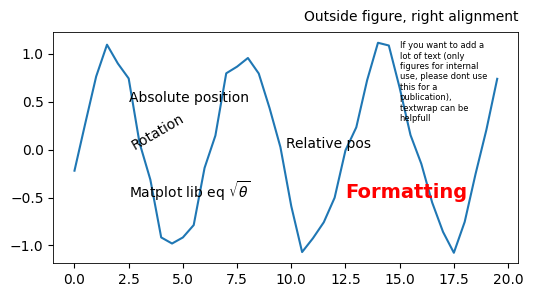

In [51]:
plt.plot(data1.x, data1.y)

# absolute position, ie. using axis values as reference
plt.text(2.5, 0.5, 'Absolute position')

# plot relative position use relative position, ie input values 0 to 1
plt.text(0.5, 0.5, 'Relative pos', transform=plt.gca().transAxes )

# outside figure, right aligned
plt.text(1, 1.05, 'Outside figure, right alignment', transform=plt.gca().transAxes, horizontalalignment='right')

# formatting
plt.text(12.5, -0.5, 'Formatting', fontsize=14, color='red', weight='bold')

# rotation
plt.text(2.5, 0, 'Rotation', rotation=30)

# latex
plt.text(2.5, -0.5, r'Matplot lib eq $\sqrt{\theta}$')

plt.text(15, 0.3, textwrap.fill('If you want to add a lot of text (only figures for internal use, please dont use this for a publication), textwrap can be helpfull', width=20), fontsize=6)
#plt.text(2.5, -0.7, r'Matplot lib eq $\sqrt{\theta}$', usetex=True) # this is however slow to render


# 5)Subplots

### Subplots with different sizes using plt.subplot2grid

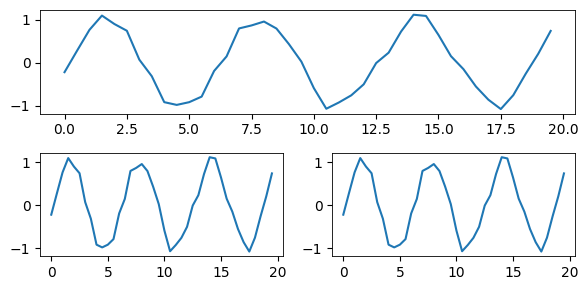

In [52]:
ax1 = plt.subplot2grid((2,2), (0,0),colspan=2)
plt.plot(data1.x, data1.y)

ax2 = plt.subplot2grid((2,2), (1,0))
plt.plot(data1.x, data1.y)
ax3 = plt.subplot2grid((2,2), (1,1))
plt.plot(data1.x, data1.y)

plt.tight_layout()


### Create blank subplot

Text(0, 0.3, 'Axis disabled.\nYou can put text here!')

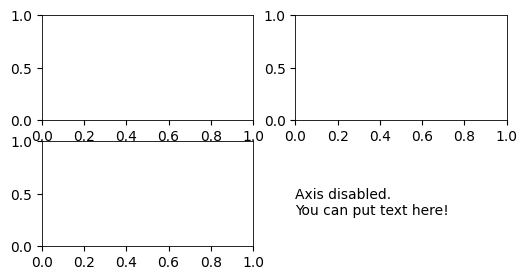

In [53]:
hf, ha = plt.subplots(2,2)
ha[-1, -1].axis('off') # disabel axis
plt.text(0,0.3, 'Axis disabled.\nYou can put text here!', transform=ha[-1,-1].transAxes)

### Inset plot

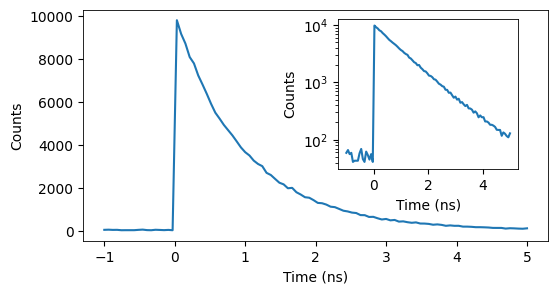

In [54]:
# main figure
fig = plt.figure()
plt.plot(data2.x, data2.y)
plt.xlabel('Time (ns)')
plt.ylabel('Counts')

# inset
left, bottom, width, height = [0.55, 0.35, 0.3, 0.5] #  lower left pos of inset and width, height in units of figure size
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(data2.x, data2.y)
ax2.set_yscale('log')
ax2.set_xlabel('Time (ns)')
ax2.set_ylabel('Counts')

plt.show()

### Share y-axis

Text(0.5, 0, 'Common xaxis')

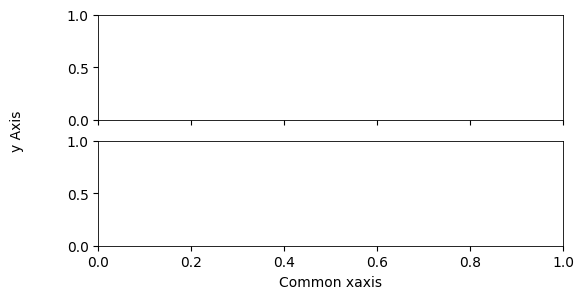

In [55]:
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)
ax1.set_ylabel('y Axis')
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.yaxis.set_label_coords(-0.16, -0.1)
ax2.set_xlabel('Common xaxis')

### Share x-axis

Text(0.5, 0, 'Common xaxis')

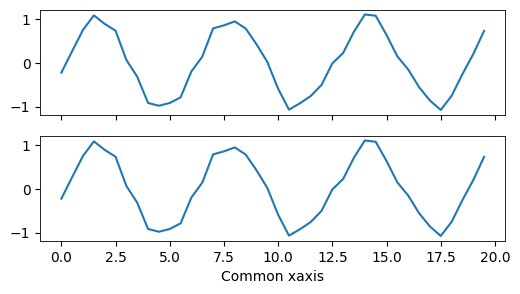

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)

ax1.plot(data1.x, data1.y)
ax2.plot(data1.x, data1.y)
ax2.set_xlabel('Common xaxis')

### Avoid overlap

In [57]:
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None) # play around with this untill spacing is right

<Figure size 600x300 with 0 Axes>

# 7) Draw shapes

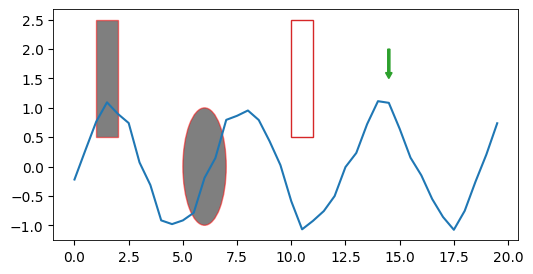

In [60]:
# plot some data
plt.plot(data1.x, data1.y)

# Create a Rectangle patch
rect = patches.Rectangle((1, 0.5), 1, 2, linewidth=1, edgecolor='r', facecolor='black', alpha=0.5) # alpha controlls face and edge
plt.gca().add_patch(rect)
rect = patches.Rectangle((10, 0.5), 1, 2, linewidth=1, edgecolor='tab:red', facecolor=(0,0,0,0)) # transparend face
plt.gca().add_patch(rect)

# Create a circular patch
rect = patches.Circle((6, 0), 1, linewidth=1, edgecolor='r', facecolor='black', alpha=0.5)
plt.gca().add_patch(rect)

# arrow from (x,y) to (x+dx, y+dy)
arrow = patches.Arrow(x=14.5, y=2, dx=0, dy=-0.5, width=0.5, color='tab:green') 
plt.gca().add_patch(arrow)

### Add shapes outside the plotting area

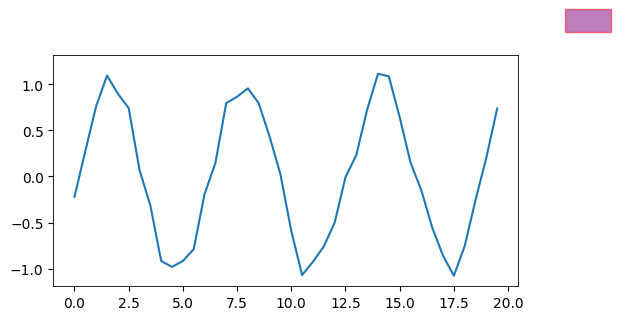

In [63]:
# plot some data
plt.plot(data1.x, data1.y)

# Create a Rectangle patch outside the axes without the axes resizing automatically, also use relative coordinates
rect = patches.Rectangle((1.1,1.1), 0.1,0.1, linewidth=1, edgecolor='r', facecolor='purple', alpha=0.5, clip_on=False, transform=plt.gca().transAxes )
plt.gca().add_patch(rect)


### Add lines

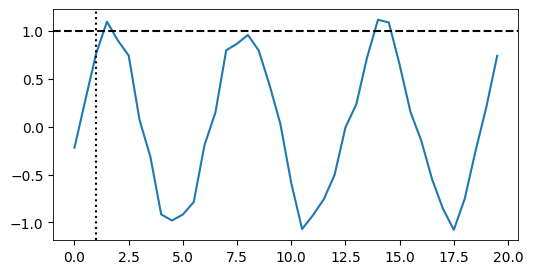

In [64]:
plt.plot(data1.x, data1.y)
ax = plt.gca()

ax.axhline(1, linestyle='--', color='k') # horizontal lines
ax.axvline(1, linestyle=':', color='k') # vertical lines

# 8) Exporting images

In [65]:
# remove bounding box
fig_hist.savefig('Hist1D_V1.svg', bbox_inches='tight')

# options
# set bbox_inches='tight' to reduce canvas size
# transparent = True make the axes (ie. figure inside) transparent
# facecolor is the color of the canvas, set to #ffffff to avoid transparency issue. Set to None to avoid the canvas

# what I use for QD notebook:
fig_hist.savefig('Hist1D_V1.svg', bbox_inches='tight', facecolor='#ffffff')


NameError: name 'fig_hist' is not defined

# 9) Working with colours

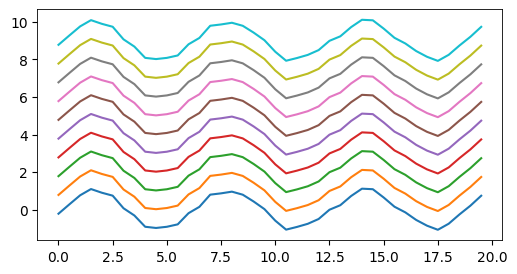

In [66]:
# get the standard tab 10 colours:
plt.cm.tab10.colors

plt.figure()
for i in range(10):
    plt.plot(data1.x, data1.y+i, color=plt.cm.tab10.colors[i])

C:\Users\marti\AppData\Local\Temp\ipykernel_11648\1232384773.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('viridis', N) # create a colourmap


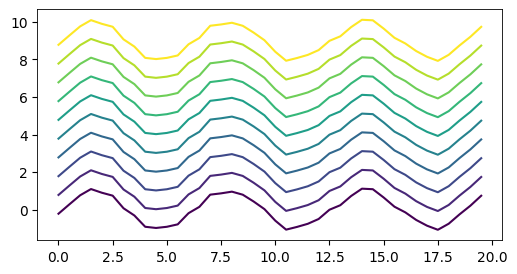

In [67]:
# create n equally spaced colors from a colourmap:
N = 10
color_map = cm.get_cmap('viridis', N) # create a colourmap
color_range = color_map( range(N)) # get an array of colours

plt.figure()
for i in range(N):
    plt.plot(data1.x, data1.y+i, color=color_range[i,:])

# 10) More niche exampels

## XY correlation plot

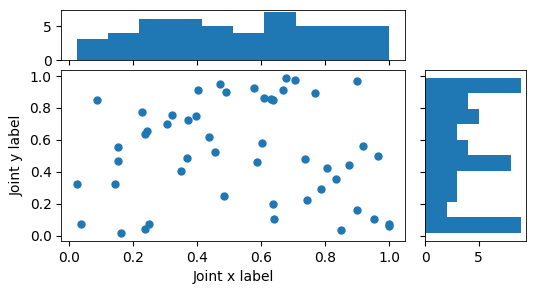

In [68]:
x = np.random.rand(50)
y = np.random.rand(50)

fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y)
ax_marg_x.hist(x)
ax_marg_y.hist(y,orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

# Set labels on marginals
#ax_marg_y.set_xlabel('Marginal x label')
#ax_marg_x.set_ylabel('Marginal y label')
plt.show()